In [1]:
    import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import NN_helpers

In [2]:
diab=pd.read_csv('datasets/diabetes.csv')

train,test=train_test_split(diab,test_size=0.1,random_state=0,stratify=diab['Outcome'])

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['Outcome']
y_test=test['Outcome']

In [3]:
n_iters = 10000
classifier = MLPClassifier(hidden_layer_sizes=(4), activation='logistic', n_iter_no_change=n_iters, max_iter=n_iters)

In [4]:
classifier.fit(X_train, y_train)

/home/maaslak/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10000, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
y_predicted = classifier.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[44,  6],
       [ 6, 21]])

layer weight matrix shapes: [(8, 4), (4, 1)]
detected layer sizes: [8, 4, 1]


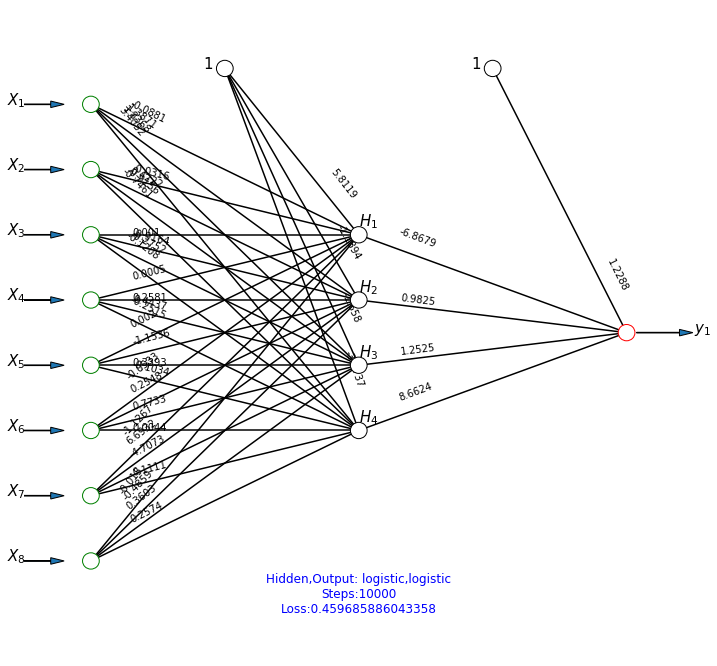

In [6]:
# NN_helpers.draw_response(classifier, X_test, Y_test)
NN_helpers.draw_nn(classifier)

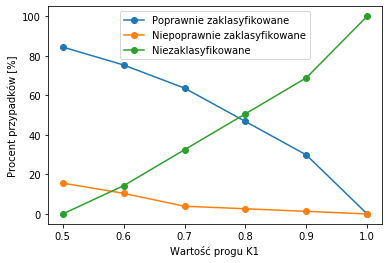

In [7]:
outputs = classifier.predict_proba(X_test)[:, 0]
K1 = [0.50001, 0.6, 0.7, 0.8, 0.9, 1.0]
K0 = [0.49999, 0.4, 0.3, 0.2, 0.1, 0.0]

true = []
false = []
not_clasified = []

for k1, k0 in zip(K1, K0):
    pred_k1 = outputs > k1
    pred_k0 = outputs < k0
    TP = np.sum(np.bitwise_and(pred_k1, 1 - y_test))
    TN = np.sum(np.bitwise_and(pred_k0, y_test))
    FP = np.sum(np.bitwise_and(pred_k1, y_test))
    FN = np.sum(np.bitwise_and(pred_k0, 1 - y_test))
    true.append(100 * (TP + TN) / len(outputs))
    false.append(100 * (FP + FN) / len(outputs))
    not_clasified.append(100 * (len(outputs) - sum([TP, TN, FP, FN])) / len(outputs))

plt.plot(K1, true, 'o-', label="Poprawnie zaklasyfikowane")
plt.plot(K1, false, 'o-', label="Niepoprawnie zaklasyfikowane")
plt.plot(K1, not_clasified, 'o-', label="Niezaklasyfikowane")
plt.xlabel("Wartość progu K1")
plt.ylabel("Procent przypadków [%]")
plt.legend()
plt.show()

In [8]:
ds = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(ds['data'], ds['target'], test_size=0.1, random_state=42)


In [13]:
n_iters = 4000
classifier = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', n_iter_no_change=n_iters, max_iter=n_iters)
classifier.fit(X_train, y_train)
print("Accuracy: {}".format(classifier.score(X_test, y_test)))

Accuracy: 1.0


/home/maaslak/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


layer weight matrix shapes: [(4, 3), (3, 3)]
detected layer sizes: [4, 3, 3]


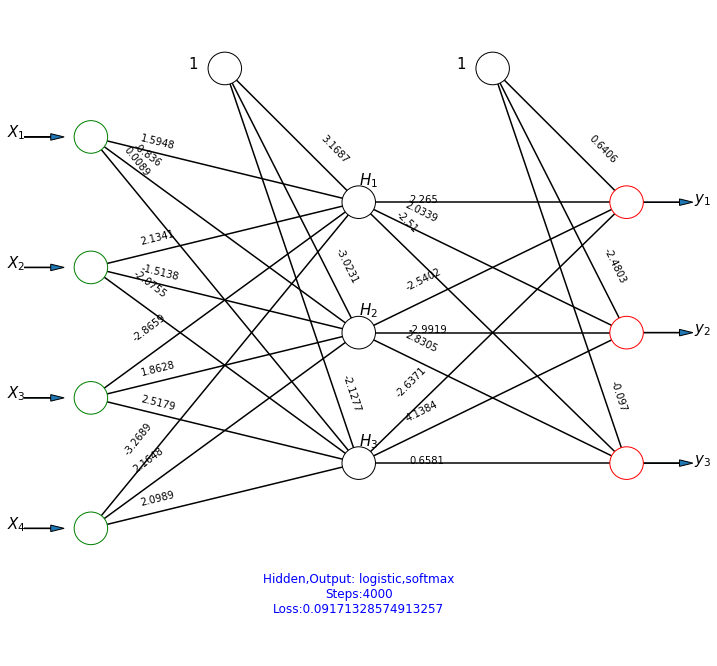

In [14]:
NN_helpers.draw_nn(classifier)